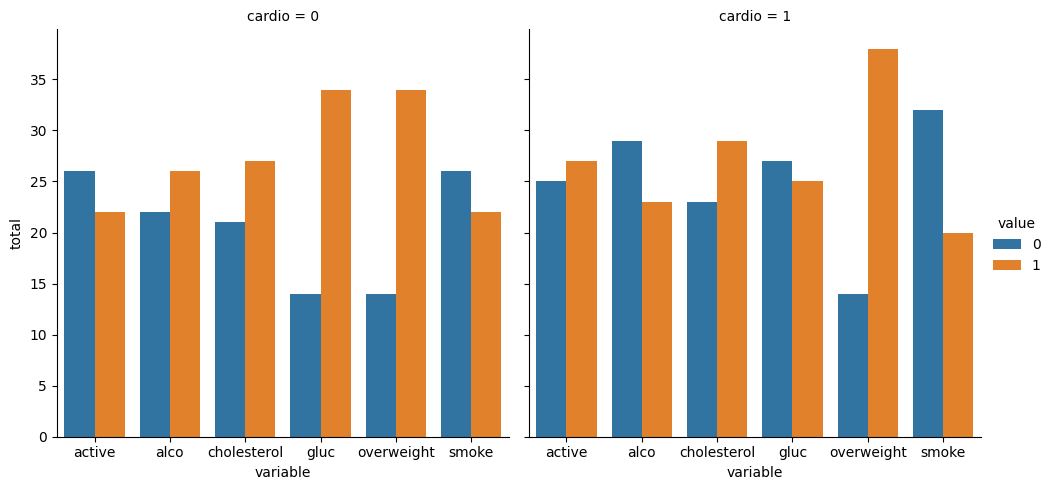

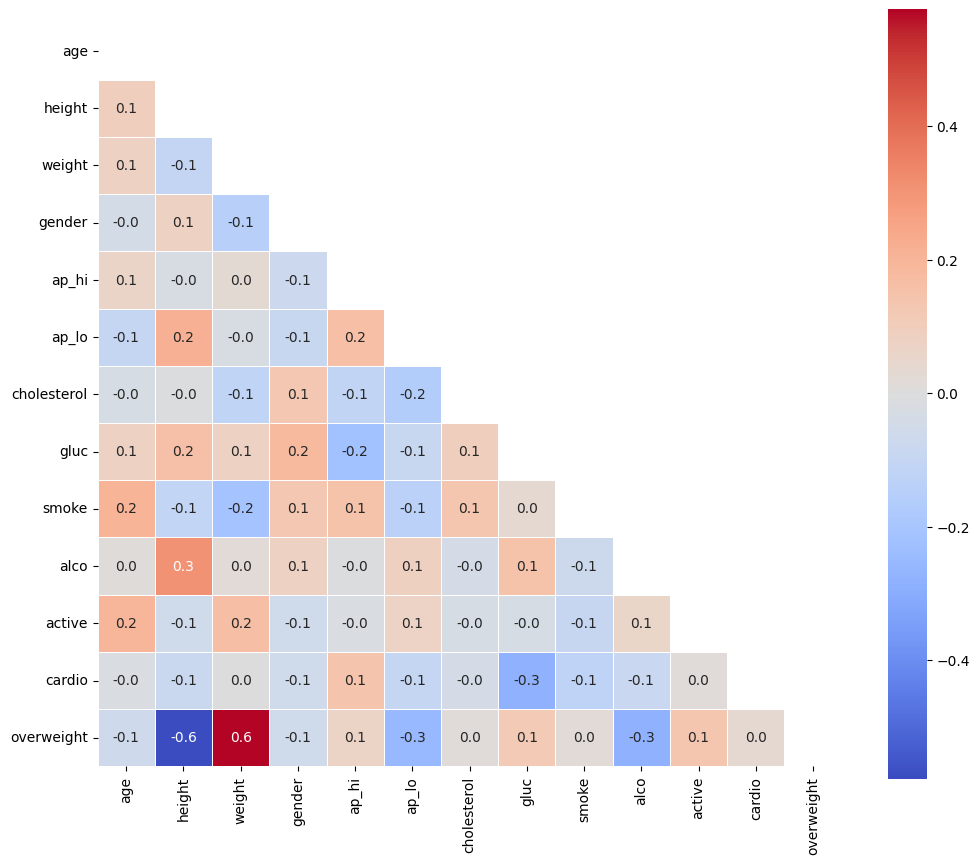

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def load_data():
    # Import the data from 'medical_examination.csv'
    df = pd.read_csv('medical_examination.csv')

    # Add an overweight column
    df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
    df['overweight'] = (df['BMI'] > 25).astype(int)
    df.drop(columns=['BMI'], inplace=True)

    # Normalize cholesterol and glucose data
    df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
    df['gluc'] = (df['gluc'] > 1).astype(int)

    return df

def draw_cat_plot(df):
    # Create DataFrame for cat plot
    df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Draw the categorical plot
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio',
                    data=df_cat, kind='bar', height=5, aspect=1)

    return g.fig

def draw_heat_map(df):
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', square=True, linewidths=0.5)

    return fig

if __name__ == "__main__":
    df = load_data()
    cat_plot = draw_cat_plot(df)
    heat_map = draw_heat_map(df)

    # Show plots
    plt.show()